# 1.資料處理

In [3]:
import pandas as pd
#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

predict=[]
for i in data['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

data['RR']=predict
y=data['RR']
y.drop(index=y.index[-1],axis=0,inplace=True)
counts = y.value_counts()

# 計算百分比
percentages = y.value_counts(normalize=True) * 100

# 輸出結果
print("各類別個數:")
print(counts)
print("\n各類別百分比:")
print(percentages)

各類別個數:
RR
0    1871
1    1608
Name: count, dtype: int64

各類別百分比:
RR
0    53.779822
1    46.220178
Name: proportion, dtype: float64


# 2.類神經網路


  Using cached tensorflow-2.13.1-cp38-cp38-win_amd64.whl (1.9 kB)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 7)                 322       
                                                                 
 dense_10 (Dense)            (None, 7)                 56        
                                                                 
 dense_11 (Dense)            (None, 1)                 8         
                                                                 
Total params: 386 (1.51 KB)
Trainable params: 386 (1.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6932 - acc: 0.4845 - mse: 0.2500 - getRecall: 0.5154 - getPrecision: 0.5093
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - los

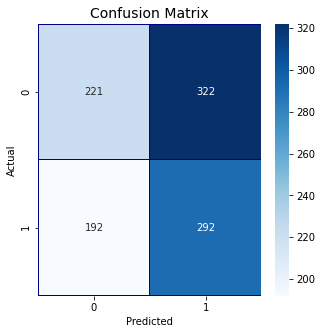

33/33 [==============================] - 0s 724us/step


0.4956927385355311

In [ ]:
#個別模型準確率:Artificial neural network
!pip install --upgrade tensorflow
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(0)
tf.random.set_seed(100)
#讀取資料和資料處理
#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)




#資料切割
#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]



classifier=Sequential()

classifier.add(Dense(units=7,kernel_initializer='uniform',activation='relu',input_dim=45))
classifier.add(Dense(units=7,kernel_initializer='uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

import keras.backend as K
def getRecall(y_true,y_pred):
    true_positives=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    possible_positives=K.sum(K.round(K.clip(y_true,0,1)))
    recall=true_positives/(possible_positives+K.epsilon())
    return recall

def getPrecision(y_true,y_pred):
    true_positives=K.sum(K.round(K.clip(y_true*y_pred,0,1)))
    predicted_positives=K.sum(K.round(K.clip(y_pred,0,1)))
    precision=true_positives/(predicted_positives+K.epsilon())
    return precision

classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc','mse',getRecall,getPrecision])
print(classifier.summary())

import time
start_time = time.time()
classifier.fit(X_train,y_train,batch_size=1500,epochs=150)
end_time = time.time()
elapsed_time = end_time - start_time
print('類神經網路運算時間:', elapsed_time, '秒')

scores_train=classifier.evaluate(X_train,y_train)
scores_test=classifier.evaluate(X_test,y_test)
print('訓練集準確率:',scores_train[1])
print('測試集準確率:',scores_test[1])



y_pred_proba = classifier.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
y_pred = np.reshape(y_pred, (-1))



from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)
plt.show()

from sklearn.metrics import confusion_matrix,roc_curve,auc

y_pred_proba=classifier.predict(X_test)
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

auc(fpr,tpr)



# 3.決策樹

Best params: {'model__min_samples_leaf': 65, 'model__min_samples_split': 10, 'selector__k': 17}
Selected Features: Index(['Volume(1000shares)', 'turnover(1000)', 'k', 'd', 'bias5', 'bias10',
       'bias20', 'rsi', 'w%r', 'mtm', 'ar', 'br', 'Qfii Net S/B M.Cap',
       'Return on Total Assets Growth Rate - YOY', 'Cash Dividend Yield',
       'Dividend Yield', 'Capital Adequacy Ratio'],
      dtype='object')
程式執行時間： 0.023800373077392578 秒
Accuracy: 49.85%
混淆矩陣:
 [[268 275]
 [240 244]]
AUC: 0.49490320076708827
              precision    recall  f1-score   support

           0       0.53      0.49      0.51       543
           1       0.47      0.50      0.49       484

    accuracy                           0.50      1027
   macro avg       0.50      0.50      0.50      1027
weighted avg       0.50      0.50      0.50      1027

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.49      0.50      0.51      0.50      0.25   

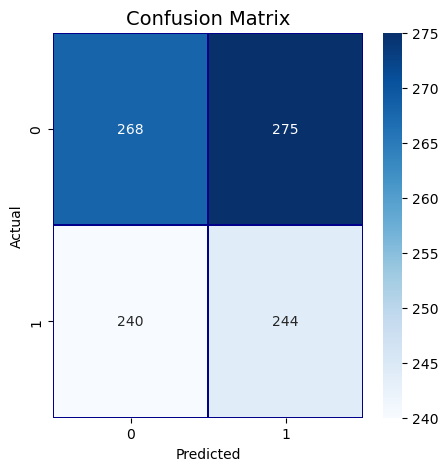

In [5]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

#特徵選取
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([('selector',SelectKBest(f_regression)),('model',DecisionTreeClassifier(random_state = 100))])

search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[15,16,17,18,19,20,21],'model__min_samples_leaf':np.arange(10,100,5),'model__min_samples_split':np.arange(10,100,5)},
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
    verbose=0
)
search.fit(X,y)

# 獲取最佳特徵選擇器
best_selector = search.best_estimator_['selector']

# 獲取選擇的特徵索引
selected_features_indices = best_selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print('Best params:',search.best_params_)
print("Selected Features:", selected_features)


X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# 創建並訓練新的模型
model = DecisionTreeClassifier(random_state=100,
                               min_samples_leaf=search.best_params_['model__min_samples_leaf'],
                               min_samples_split=search.best_params_['model__min_samples_split'])

import time
start_time = time.time()
model.fit(X_train_selected, y_train)
#運算時間
end_time = time.time()
execution_time = end_time - start_time
print("程式執行時間：", execution_time, "秒")

# 在測試集上進行預測
y_pred = model.predict(X_test_selected)

# 評估模型
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100:.2f}%')

#混淆矩陣畫圖
from sklearn.metrics import confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
y_pred=model.predict(X_test_selected)
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)

#計算 AUC（曲線下面積）
y_pred_proba=model.predict_proba(X_test_selected)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

print('AUC:',auc(fpr,tpr))

#效能衡量指標
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))




# 4.隨機森林

Best params: {'model__n_estimators': 30, 'selector__k': 17}
Selected Features: Index(['Volume(1000shares)', 'turnover(1000)', 'k', 'd', 'bias5', 'bias10',
       'bias20', 'rsi', 'w%r', 'mtm', 'ar', 'br', 'Qfii Net S/B M.Cap',
       'Return on Total Assets Growth Rate - YOY', 'Cash Dividend Yield',
       'Dividend Yield', 'Capital Adequacy Ratio'],
      dtype='object')
程式執行時間： 0.23891711235046387 秒
Accuracy: 48.69%
混淆矩陣:
 [[317 226]
 [301 183]]
AUC: 0.4720579729997108
              precision    recall  f1-score   support

           0       0.51      0.58      0.55       543
           1       0.45      0.38      0.41       484

    accuracy                           0.49      1027
   macro avg       0.48      0.48      0.48      1027
weighted avg       0.48      0.49      0.48      1027

                   pre       rec       spe        f1       geo       iba       sup

          0       0.51      0.58      0.38      0.55      0.47      0.23       543
          1       0.45      0.

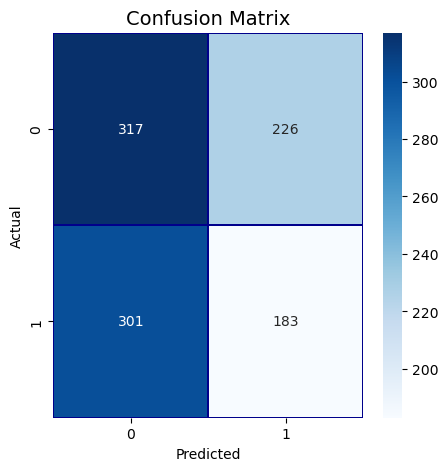

In [6]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

#特徵選取
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([('selector',SelectKBest(f_regression)),('model',RandomForestClassifier(random_state = 100))])

search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[15,16,17,18,19,20,21],'model__n_estimators':np.arange(10,200,10)},
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
    verbose=0
)
search.fit(X,y)

# 獲取最佳特徵選擇器
best_selector = search.best_estimator_['selector']

# 獲取選擇的特徵索引
selected_features_indices = best_selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print('Best params:',search.best_params_)
print("Selected Features:", selected_features)


X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# 創建並訓練新的模型
model = RandomForestClassifier(random_state=100,
                               n_estimators=search.best_params_['model__n_estimators'],)

import time
start_time = time.time()
model.fit(X_train_selected, y_train)
#運算時間
end_time = time.time()
execution_time = end_time - start_time
print("程式執行時間：", execution_time, "秒")

# 在測試集上進行預測
y_pred = model.predict(X_test_selected)

# 評估模型
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100:.2f}%')

#混淆矩陣畫圖
from sklearn.metrics import confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
y_pred=model.predict(X_test_selected)
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)

#計算 AUC（曲線下面積）
y_pred_proba=model.predict_proba(X_test_selected)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

print('AUC:',auc(fpr,tpr))


#效能衡量指標
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))




# 5.支援向量機SVM

Best params: {'model__C': 20, 'model__gamma': 0.001, 'selector__k': 17}
Selected Features: Index(['Volume(1000shares)', 'turnover(1000)', 'k', 'd', 'bias5', 'bias10',
       'bias20', 'rsi', 'w%r', 'mtm', 'ar', 'br', 'Qfii Net S/B M.Cap',
       'Return on Total Assets Growth Rate - YOY', 'Cash Dividend Yield',
       'Dividend Yield', 'Capital Adequacy Ratio'],
      dtype='object')
程式執行時間： 1.4181411266326904 秒
Accuracy: 52.19%
混淆矩陣:
 [[493  50]
 [441  43]]
AUC: 0.4856931951356863
              precision    recall  f1-score   support

           0       0.53      0.91      0.67       543
           1       0.46      0.09      0.15       484

    accuracy                           0.52      1027
   macro avg       0.50      0.50      0.41      1027
weighted avg       0.50      0.52      0.42      1027

                   pre       rec       spe        f1       geo       iba       sup

          0       0.53      0.91      0.09      0.67      0.28      0.09       543
          1       0

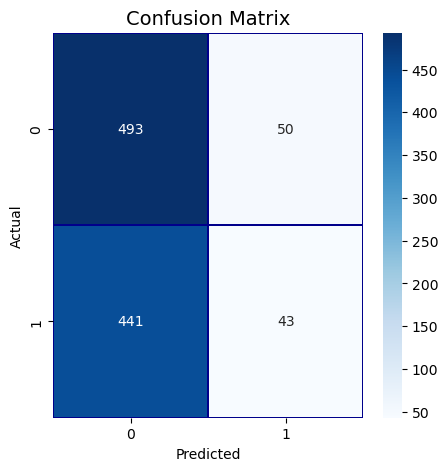

In [7]:
from sklearn import svm
from sklearn.svm import SVC
import pandas as pd

#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())


predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

#特徵選取
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([('selector',SelectKBest(f_regression)),('model',SVC(random_state = 100,probability=True))])

search = GridSearchCV(
    estimator = pipeline,
    param_grid = {'selector__k':[15,16,17,18,19,20,21],
                  'model__C':np.arange(10,50,10),
                  'model__gamma':[0.001,0.01,0.1]},
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
    verbose=0
)
search.fit(X,y)

# 獲取最佳特徵選擇器
best_selector = search.best_estimator_['selector']

# 獲取選擇的特徵索引
selected_features_indices = best_selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print('Best params:',search.best_params_)
print("Selected Features:", selected_features)


X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# 創建並訓練新的模型
model = SVC(random_state=100,
            kernel='rbf',
            probability=True,
            gamma=search.best_params_['model__gamma'],
            C=search.best_params_['model__C'])

import time
start_time = time.time()
model.fit(X_train_selected, y_train)
#運算時間
end_time = time.time()
execution_time = end_time - start_time
print("程式執行時間：", execution_time, "秒")

# 在測試集上進行預測
y_pred = model.predict(X_test_selected)

# 評估模型
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100:.2f}%')

#混淆矩陣畫圖
from sklearn.metrics import confusion_matrix,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns
y_pred=model.predict(X_test_selected)
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)

#計算 AUC（曲線下面積）
y_pred_proba=model.predict_proba(X_test_selected)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

print('AUC:',auc(fpr,tpr))


#效能衡量指標
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))




# 6.AdaBoost

Best params: {'model__learning_rate': 0.1, 'model__n_estimators': 50, 'selector__k': 19}
Selected Features: Index(['Volume(1000shares)', 'turnover(1000)', 'k', 'd', 'bias5', 'bias10',
       'bias20', 'rsi', 'w%r', 'mtm', 'macd', 'macdhist', 'ar', 'br',
       'Qfii Net S/B M.Cap', 'Return on Total Assets Growth Rate - YOY',
       'Cash Dividend Yield', 'Dividend Yield', 'Capital Adequacy Ratio'],
      dtype='object')
AdaBoost運算時間: 0.5681498050689697 秒
Accuracy: 49.95%
              precision    recall  f1-score   support

           0     0.5174    0.7956    0.6270       543
           1     0.4219    0.1674    0.2396       484

    accuracy                         0.4995      1027
   macro avg     0.4696    0.4815    0.4333      1027
weighted avg     0.4724    0.4995    0.4444      1027

                   pre       rec       spe        f1       geo       iba       sup

          0       0.52      0.80      0.17      0.63      0.36      0.14       543
          1       0.42      0.

0.49808608434926865

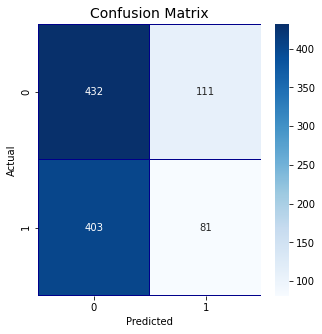

In [ ]:
import pandas as pd
!pip install imbalanced-learn
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

#特徵選取
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([('selector',SelectKBest(f_regression)),('model',AdaBoostClassifier(random_state = 100))])

param_grid = {
    'selector__k': [15, 16, 17, 18, 19, 20, 21],
    'model__n_estimators':range(50, 250,50),
    'model__learning_rate':[0.001,0.01,0.1]

}
search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
    verbose=0
)
search.fit(X,y)

# 獲取最佳特徵選擇器
best_selector = search.best_estimator_['selector']

# 獲取選擇的特徵索引
selected_features_indices = best_selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print('Best params:',search.best_params_)
print("Selected Features:", selected_features)


X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# 創建並訓練新的模型
model = AdaBoostClassifier(random_state=100,
                      n_estimators=search.best_params_[ 'model__n_estimators'],
                      learning_rate=search.best_params_['model__learning_rate']
                     )
#計算時間
import time
start_time = time.time()
model.fit(X_train_selected, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

print('AdaBoost運算時間:', elapsed_time, '秒')


# 在測試集上進行預測
y_pred = model.predict(X_test_selected)

# 評估模型
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100:.2f}%')


#效能衡量指標
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=4))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))

#混淆矩陣
from sklearn.metrics import confusion_matrix,roc_curve,auc
y_pred=model.predict(X_test_selected)
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)

#計算 AUC（曲線下面積）
y_pred_proba=model.predict_proba(X_test_selected)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

auc(fpr,tpr)


# 7.XGBoost

C:\Users\anson\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'model__learning_rate': 0.1, 'model__max_depth': 4, 'model__min_child_weight': 15, 'model__n_estimators': 10, 'selector__k': 19}
Selected Features: Index(['Volume(1000shares)', 'turnover(1000)', 'k', 'd', 'bias5', 'bias10',
       'bias20', 'rsi', 'w%r', 'mtm', 'macd', 'macdhist', 'ar', 'br',
       'Qfii Net S/B M.Cap', 'Return on Total Assets Growth Rate - YOY',
       'Cash Dividend Yield', 'Dividend Yield', 'Capital Adequacy Ratio'],
      dtype='object')
XG Boost運算時間: 0.06818079948425293 秒
Accuracy: 51.12%
              precision    recall  f1-score   support

           0     0.5232    0.8527    0.6485       543
           1     0.4366    0.1281    0.1981       484

    accuracy                         0.5112      1027
   macro avg     0.4799    0.4904    0.4233      1027
weighted avg     0.4824    0.5112    0.4362      1027

                   pre       rec       spe        f1       geo       iba       sup

          0       0.52      0.85      0.13      0.65      

0.4952228208757591

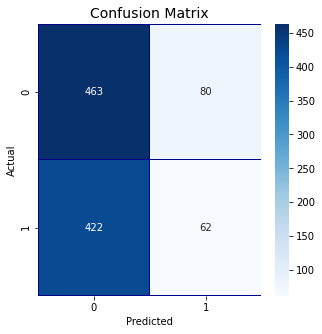

In [ ]:
import pandas as pd
!pip install imbalanced-learn
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())



predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

#特徵選取
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
pipeline = Pipeline([('selector',SelectKBest(f_regression)),('model',XGBClassifier(random_state = 100))])

param_grid = {
    'selector__k': [15, 16, 17, 18, 19, 20, 21],
    'model__max_depth': range(2,10,2),
    'model__min_child_weight':range(5,21,5),
    'model__n_estimators':range(10, 200, 20),
    'model__learning_rate':[0.001,0.01,0.1]

}
search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    n_jobs=-1,
    scoring="accuracy",
    cv=5,
    verbose=0
)
search.fit(X,y)

# 獲取最佳特徵選擇器
best_selector = search.best_estimator_['selector']

# 獲取選擇的特徵索引
selected_features_indices = best_selector.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
print('Best params:',search.best_params_)
print("Selected Features:", selected_features)


X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# 創建並訓練新的模型
model = XGBClassifier(random_state=100,
                      max_depth=search.best_params_['model__max_depth'],
                      min_child_weight=search.best_params_['model__min_child_weight'],
                      n_estimators=search.best_params_[ 'model__n_estimators'],
                      learning_rate=search.best_params_['model__learning_rate']
                     )
#計算時間
import time
start_time = time.time()
model.fit(X_train_selected, y_train)
end_time = time.time()
elapsed_time = end_time - start_time

print('XG Boost運算時間:', elapsed_time, '秒')


# 在測試集上進行預測
y_pred = model.predict(X_test_selected)

# 評估模型
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", f'{accuracy*100:.2f}%')


#效能衡量指標
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=4))

from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))

#混淆矩陣
from sklearn.metrics import confusion_matrix,roc_curve,auc
y_pred=model.predict(X_test_selected)
cm=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
fig,(ax1)=plt.subplots(ncols=1,figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g',ax=ax1,
           linewidths=.2,linecolor='Darkblue',cmap='Blues'
           )
print('混淆矩陣:\n',confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix',fontsize=14)

#計算 AUC（曲線下面積）
y_pred_proba=model.predict_proba(X_test_selected)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

auc(fpr,tpr)

# 8.Stacking全學習器

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [6]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.54378819]
    fold  1:  [0.56619145]
    fold  2:  [0.57551020]
    fold  3:  [0.50612245]
    fold  4:  [0.51836735]
    ----
    MEAN:     [0.54199593] + [0.02667230]
    FULL:     [0.54200653]

model  1:     [RandomForestClassifier]


C:\Users\anson\anaconda3\lib\site-packages\vecstack\core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


    fold  0:  [0.50916497]
    fold  1:  [0.54989817]
    fold  2:  [0.51836735]
    fold  3:  [0.53469388]
    fold  4:  [0.48367347]


C:\Users\anson\anaconda3\lib\site-packages\vecstack\core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


    ----
    MEAN:     [0.51915957] + [0.02256528]
    FULL:     [0.51916803]

model  2:     [XGBClassifier]
    fold  0:  [0.54378819]
    fold  1:  [0.55397149]
    fold  2:  [0.54285714]
    fold  3:  [0.53469388]
    fold  4:  [0.54693878]


C:\Users\anson\anaconda3\lib\site-packages\vecstack\core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


    ----
    MEAN:     [0.54444989] + [0.00624516]
    FULL:     [0.54445351]

model  3:     [SVC]
    fold  0:  [0.57026477]
    fold  1:  [0.55193483]
    fold  2:  [0.54897959]
    fold  3:  [0.53877551]
    fold  4:  [0.55306122]
    ----
    MEAN:     [0.55260318] + [0.01016782]
    FULL:     [0.55261011]

model  4:     [AdaBoostClassifier]


C:\Users\anson\anaconda3\lib\site-packages\vecstack\core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


    fold  0:  [0.54175153]
    fold  1:  [0.55397149]
    fold  2:  [0.54489796]
    fold  3:  [0.54081633]
    fold  4:  [0.54285714]
    ----
    MEAN:     [0.54485889] + [0.00475491]
    FULL:     [0.54486134]

model  5:     [KerasClassifier]


C:\Users\anson\anaconda3\lib\site-packages\vecstack\core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()
C:\Users\anson\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/150
2/2 [==============================] - 1s 11ms/step - loss: 0.6931 - acc: 0.5411 - mse: 0.2500 - getRecall: 0.0323 - getPrecision: 0.0323
Epoch 2/150
2/2 [==============================] - 0s 8ms/step - loss: 0.6930 - acc: 0.5416 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6929 - acc: 0.5416 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6928 - acc: 0.5416 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 7ms/step - loss: 0.6928 - acc: 0.5416 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6927 - acc: 0.5416 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 5ms/step - 

C:\Users\anson\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


2/2 [==============================] - 1s 4ms/step - loss: 0.6931 - acc: 0.4906 - mse: 0.2500 - getRecall: 0.3506 - getPrecision: 0.3506
Epoch 2/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6930 - acc: 0.5416 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6929 - acc: 0.5416 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6929 - acc: 0.5416 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6927 - acc: 0.5416 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6927 - acc: 0.5416 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6926 

C:\Users\anson\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


2/2 [==============================] - 1s 5ms/step - loss: 0.6931 - acc: 0.5443 - mse: 0.2500 - getRecall: 0.1455 - getPrecision: 0.1455
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6930 - acc: 0.5418 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6929 - acc: 0.5418 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6928 - acc: 0.5418 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6927 - acc: 0.5418 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6926 - acc: 0.5418 - mse: 0.2497 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6925 

C:\Users\anson\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


2/2 [==============================] - 1s 5ms/step - loss: 0.6931 - acc: 0.5204 - mse: 0.2500 - getRecall: 0.1300 - getPrecision: 0.1300
Epoch 2/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6930 - acc: 0.5418 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6929 - acc: 0.5418 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6928 - acc: 0.5418 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6927 - acc: 0.5418 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6926 - acc: 0.5418 - mse: 0.2497 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6925 

C:\Users\anson\AppData\Roaming\Python\Python38\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


2/2 [==============================] - 1s 4ms/step - loss: 0.6931 - acc: 0.4842 - mse: 0.2500 - getRecall: 0.3284 - getPrecision: 0.3284
Epoch 2/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6930 - acc: 0.5413 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 3/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6930 - acc: 0.5413 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 4/150
2/2 [==============================] - 0s 4ms/step - loss: 0.6929 - acc: 0.5413 - mse: 0.2499 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 5/150
2/2 [==============================] - 0s 3ms/step - loss: 0.6928 - acc: 0.5413 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 6/150
2/2 [==============================] - 0s 6ms/step - loss: 0.6927 - acc: 0.5413 - mse: 0.2498 - getRecall: 0.0000e+00 - getPrecision: 0.0000e+00
Epoch 7/150
2/2 [==============================] - 0s 5ms/step - loss: 0.6926 

C:\Users\anson\anaconda3\lib\site-packages\vecstack\core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


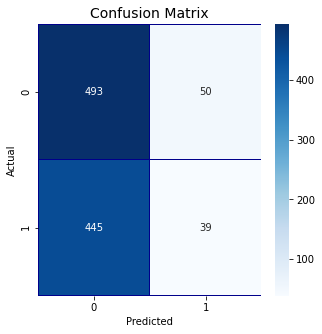

              precision    recall  f1-score   support

           0       0.53      0.91      0.67       543
           1       0.44      0.08      0.14       484

    accuracy                           0.52      1027
   macro avg       0.48      0.49      0.40      1027
weighted avg       0.48      0.52      0.42      1027

AUC: 0.49518857586411585
Logistic Regression coefficients:
[ 0.25114972  0.00619003 -0.17947739  0.42179181  0.32810879 -0.09562609]
Logistic Regression intercept:
[-0.28141383]


In [ ]:
from vecstack import stacking
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

#讀取資料
bank=pd.read_csv("2886final.csv")
bank = bank.drop(['Instrument','Date','Quarter'],axis=1)
bank['ROI%'] = bank['ROI%'].shift(-1)

# 提取特徵欄位名稱
feature_names = bank.drop(['ROI%'], axis=1).columns.tolist()

X = bank.drop(['ROI%'],axis=1)
X=pd.DataFrame(X)
X.drop(index=X.index[-1],axis=0,inplace=True)

#資料標準化
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X=pd.DataFrame(X,columns=feature_names)
static=X.describe()
#X.info()
#a=pd.DataFrame(X.corr())


predict=[]
for i in bank['ROI%']:
    if i>0:
        predict.append(1)
    else:
        False
        predict.append(0)

bank['ROI%']=predict
y=bank['ROI%']
y.drop(index=y.index[-1],axis=0,inplace=True)

#資料切割(2020/1/2前為疫情前，後為疫情後)
split_index=2452
X_train=X.iloc[:split_index]
X_test=X.iloc[split_index:]
y_train=y.iloc[:split_index]
y_test=y.iloc[split_index:]

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
import keras.backend as K
def getRecall(y_true,y_pred):
    true_positives = tf.cast(K.sum(K.round(K.clip(y_true*y_pred, 0, 1))), tf.float32)
    possible_positives = tf.cast(K.sum(K.round(K.clip(y_true, 0, 1))), tf.float32)
    recall=true_positives/(possible_positives+K.epsilon())
    return recall

def getPrecision(y_true,y_pred):
    true_positives = tf.cast(K.sum(K.round(K.clip(y_true*y_pred, 0, 1))), tf.float32)
    predicted_positives = tf.cast(K.sum(K.round(K.clip(y_true, 0, 1))), tf.float32)

    precision=true_positives/(predicted_positives+K.epsilon())
    return precision



def create_model_s():
    model=Sequential()
    model.add(Dense(units=7,kernel_initializer='uniform',activation='relu',input_dim=45))
    model.add(Dense(units=7,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc','mse',getRecall,getPrecision])
    return model





#Stacking
models = [
    DecisionTreeClassifier(random_state=100, min_samples_leaf=65,min_samples_split=10),

    RandomForestClassifier(random_state=100, n_estimators=10),

    XGBClassifier(random_state=100, learning_rate=0.01,max_depth=4,min_child_weight=15,n_estimators=30),

    SVC(random_state=100,kernel='rbf',gamma=0.001,C=10,probability=False),

    AdaBoostClassifier(random_state=100,n_estimators=50,learning_rate=0.001),

    KerasClassifier(build_fn=create_model_s,epochs=150,batch_size=1200)
]


# 堆叠
import time
start_time = time.time()


S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=False,
                           needs_proba=False,
                           save_dir=None,
                           metric=accuracy_score,
                           n_folds=5,
                           stratified=True,
                           shuffle=True,
                           random_state=100,
                           verbose=2)
end_time = time.time()
elapsed_time = end_time - start_time

print('集成模型運算時間:', elapsed_time, '秒')

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
# 使用Logistic來評估特徵的重要性
model_svm=linear_model.LogisticRegression(C=10,penalty='l2',solver='liblinear',random_state=100)
model_svm=model_svm.fit(S_train,y_train)

test_prob=model_svm.predict(S_test)
test_prob.shape

#計算模型準確率
accuracy_train = model_svm.score(S_train, y_train)
accuracy_test = model_svm.score(S_test, y_test)
print('訓練集準確率:', accuracy_train)
print('測試集準確率:', accuracy_test)

from sklearn.metrics import confusion_matrix

# 混淆矩陣
y_pred = model_svm.predict(S_test)
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
fig, ax1 = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm,
           xticklabels=['0','1'],
           yticklabels=['0','1'],
           annot=True, fmt='g', ax=ax1,
           linewidths=.2, linecolor='Darkblue', cmap='Blues'
           )
print('集成模型混淆矩陣:\n', confusion_matrix(y_test, y_pred))
plt.title('Confusion Matrix', fontsize=14)
plt.show()

#混淆矩陣指標
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
y_pred=model_svm.predict(S_test)
print(classification_report(y_test, y_pred, zero_division=0))

y_pred=model_svm.predict(S_test)
y_pred_proba=model_svm.predict_proba(S_test)[:,1]
[fpr,tpr,thr]=roc_curve(y_test,y_pred_proba)
idx=np.min(np.where(tpr>0.95))

idx2=np.min(np.where(tpr>0.90))

auc(fpr,tpr)
print('AUC:',auc(fpr,tpr))

# 顯示Logistic Regression模型的係數
print("Logistic Regression coefficients:")
coefficients = model_svm.coef_[0]
print(coefficients)

# 顯示截距
print("Logistic Regression intercept:")
print(model_svm.intercept_)

